# Module 3: Data Exploration

The following tutorial contains examples of Python code for data exploration. You should refer to the "Data Exploration" chapter of the "Introduction to Data Mining" book (available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial notebook. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.ipynb.

Data exploration refers to the preliminary investigation of data in order
to better understand its specific characteristics. There are two key motivations for data exploration:
1. To help users select the appropriate preprocessing and data analysis technique used.
2. To make use of humans’ abilities to recognize patterns in the data.

Read the step-by-step instructions below carefully. To execute the code, click on the cell and press the SHIFT-ENTER keys simultaneously.

## 3.1. Summary Statistics

Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers. In this tutorial, we will use the Iris sample data, which contains information on 150 Iris flowers, 50 each from one of three Iris species: Setosa, Versicolour, and Virginica. Each flower is characterized by five attributes:

- sepal length in centimeters

- sepal width in centimeters

- petal length in centimeters

- petal width in centimeters

- class (Setosa, Versicolour, Virginica)

In this tutorial, you will learn how to:

- Load a CSV data file into a Pandas DataFrame object.

- Compute various summary statistics from the DataFrame.

To execute the sample program shown here, make sure you have installed the Pandas library (see Module 2).

**1.** First, you need to download the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">Iris dataset</a> from the UCI machine learning repository.

**<font color='red'>Code:</font>** The following code uses Pandas to read the CSV file and store them in a DataFrame object named data. Next, it will display the first five rows of the data frame.

In [ ]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**2.** For each quantitative attribute, calculate its average, standard deviation, minimum, and maximum values.

**<font color="red">Code:</font>**

In [ ]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


**3.** For the qualitative attribute (class), count the frequency for each of its distinct values.

**<font color="red">Code:</font>**

In [ ]:
data['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**4.** It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

**<font color="red">Code:</font>**

In [ ]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Note that count refers to the number of non-missing values for each attribute.

**5.** For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.

**<font color="red">Code:</font>**

In [ ]:
print('Covariance:')
numeric_data = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
numeric_data.cov()

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [ ]:
print('Correlation:')
numeric_data = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
numeric_data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## 3.2. Data Visualization

Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships
among data items or attributes can be analyzed or reported.

In this tutorial, you will learn how to display the Iris data created in Section 3.1. To execute the sample program shown here, make sure you have installed the matplotlib library package (see Module 0 on how to install Python packages).

**1.** First, we will display the histogram for the sepal length attribute by discretizing it into 8 separate bins and counting the frequency for each bin.

**<font color="red">Code:</font>**

<Axes: >

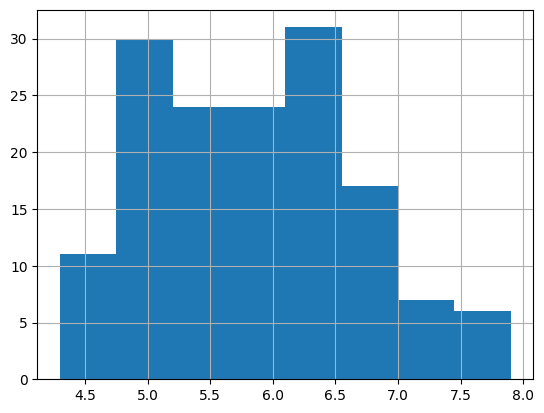

In [ ]:
%matplotlib inline

data['sepal length'].hist(bins=8)

**2.** A boxplot can also be used to show the distribution of values for each attribute.

**<font color="red">Code:</font>**

<Axes: >

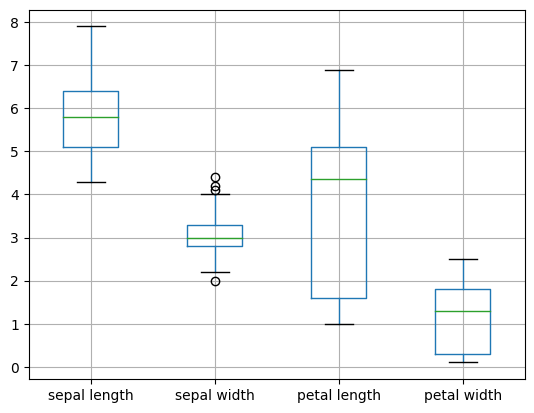

In [ ]:
data.boxplot()

**3.** For each pair of attributes, we can use a scatter plot to visualize their joint distribution.

**<font color="red">Code:</font>**

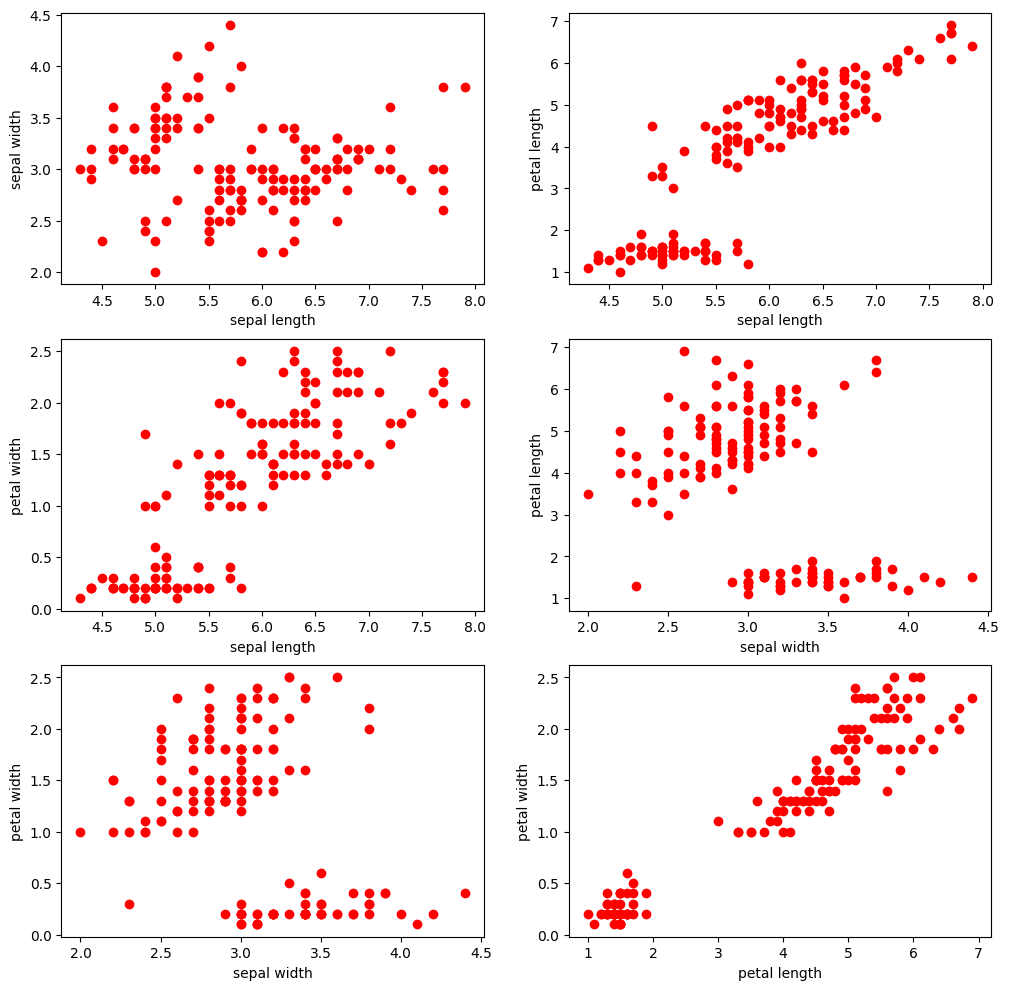

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

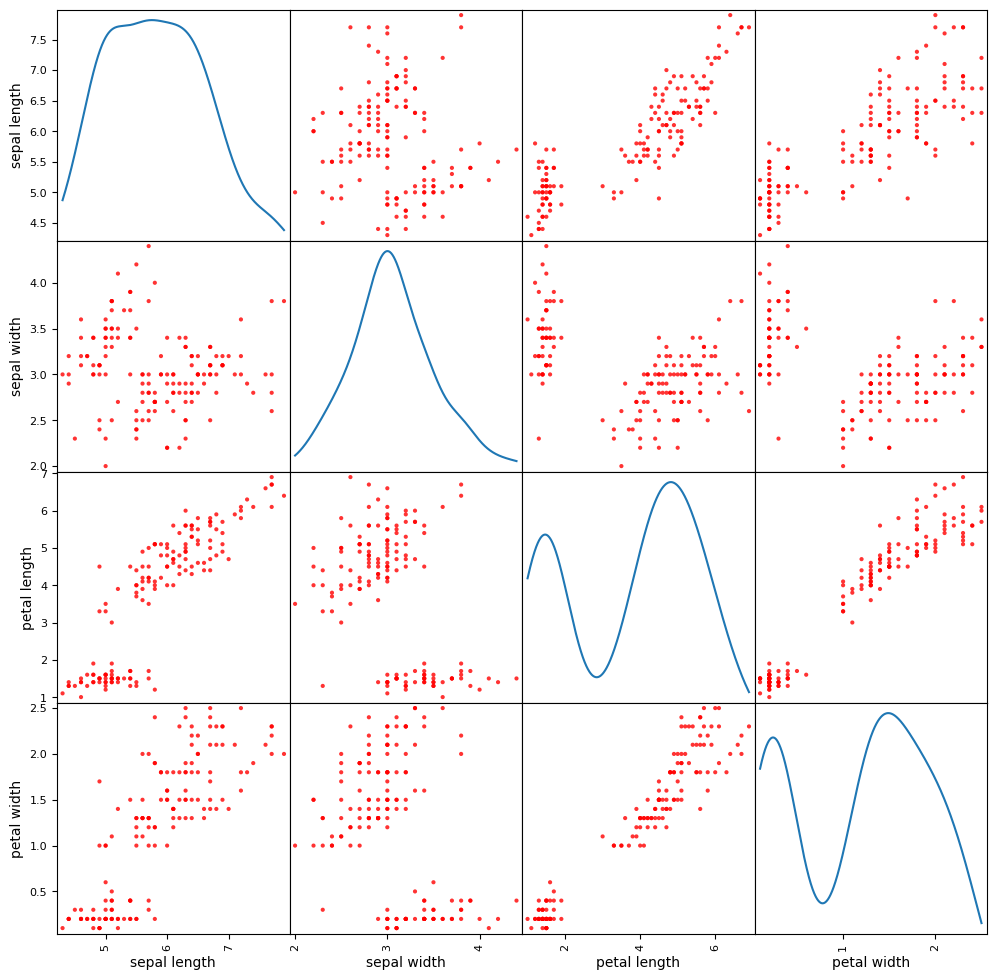

In [ ]:
from pandas.plotting import scatter_matrix




# Create pairwise scatterplots
scatter_matrix(data, alpha=0.8, figsize=(12, 12), diagonal='kde', color='red')
plt.show()

**4.** Parallel coordinates can be used to display all the data points simultaneously. Parallel coordinates have one coordinate axis for each attribute, but the different axes are parallel to one other instead of perpendicular, as is traditional. Furthermore, an object is represented as a line instead of as a point. In the example below, the distribution of values for each class can be identified in a separate color.

**<font color="red">Code:</font>**

<Axes: >

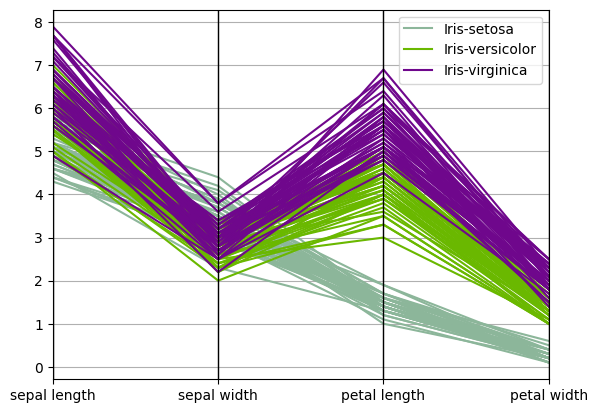

In [ ]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

## 3.3. Summary

This tutorial presents several examples for data exploration and visualization using the Pandas and matplotlib library packages available in Python.

**<font color='blue'>References:</font>**

1. Documentation on Pandas. https://pandas.pydata.org/
2. Documentation on matplotlib. https://matplotlib.org/
3. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## More Examples

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
happiness_df = pd.read_csv('http://pluto.hood.edu/~dong/datasets/happiness_2017.csv')
happiness_df.head(5)

,Country,Region,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Norway,Western Europe,1,7.537,7.578745,11.081789,0.950128,71.086586,0.953017,0.210104,0.249711,0.849100,0.202914,0.717160
1,Denmark,Western Europe,2,7.522,7.593702,10.748989,0.952100,71.662498,0.955416,0.145387,0.181148,0.823667,0.205775,0.572353
2,Iceland,Western Europe,3,7.504,7.476214,10.760409,0.966753,72.755981,0.938783,0.235479,0.726845,0.895255,0.148160,0.365042
3,Switzerland,Western Europe,4,7.494,7.473593,10.955548,0.949661,73.173759,0.924997,0.167875,0.316183,0.773997,0.195871,0.819707
4,Finland,Western Europe,5,7.469,7.788252,10.612338,0.963826,71.696960,0.962199,-0.012174,0.192413,0.787137,0.176066,0.597539


In [53]:
print(happiness_df.shape)
happiness_df.columns

(140, 14)


Index(['Country', 'Region', 'Rank', 'HappinessScore', 'Life Ladder',
       'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government'],
      dtype='object')

In [54]:
life_ladder_df = happiness_df[['Life Ladder','Generosity']]
print(life_ladder_df['Life Ladder'].min())
print(life_ladder_df.shape)
life_ladder_df.head(2)

2.66171813
(140, 2)


,Life Ladder,Generosity
0,7.578745,0.210104
1,7.593702,0.145387


In [ ]:
# selecting multiple columns by names.
df_1 = happiness_df.loc[:, 'Life Ladder':'Generosity']
df_1.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity
0,7.578745,11.081789,0.950128,71.086586,0.953017,0.210104
1,7.593702,10.748989,0.952100,71.662498,0.955416,0.145387
2,7.476214,10.760409,0.966753,72.755981,0.938783,0.235479
3,7.473593,10.955548,0.949661,73.173759,0.924997,0.167875
4,7.788252,10.612338,0.963826,71.696960,0.962199,-0.012174


In [ ]:
# slicing
df_2 = happiness_df.iloc[10:100, 5:10]
df_2.head()


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity
10,9.670634,0.921697,69.867302,0.935618,-0.078269
11,10.716226,0.906218,72.359711,0.890031,0.124997
12,10.899869,0.921003,69.770920,0.868497,0.181657
13,11.066487,0.943482,71.709785,0.905341,0.206802
14,10.711184,0.892166,71.079102,0.840728,0.135308


In [37]:
happiness_df['Region'].unique()
happiness_df.isnull().any()
happiness_df[happiness_df['Confidence in national government'].isnull()].head()

,Country,Region,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
19,United Arab Emirates,Middle East and North Africa,20,6.648,7.039420,11.121808,0.835527,68.581551,0.962017,0.191113,NaN,0.795035,0.207598,NaN
34,Saudi Arabia,Middle East and North Africa,35,6.344,6.294282,10.811988,0.840086,64.083740,0.814142,-0.156905,NaN,0.774876,0.305842,NaN
36,Kuwait,Middle East and North Africa,37,6.105,6.093905,11.111793,0.853491,65.378960,0.884182,-0.048504,NaN,0.692072,0.307321,NaN
38,Bahrain,Middle East and North Africa,39,6.087,6.227321,10.686713,0.875747,66.123993,0.905859,0.120759,NaN,0.813571,0.289760,NaN
48,Algeria,Middle East and North Africa,49,5.872,5.248912,9.540244,0.806754,65.699188,0.436670,-0.194670,0.699774,0.641980,0.288710,NaN


In [ ]:
western_enrope_df = happiness_df[happiness_df['Region'] == "Western Europe"]
print(western_enrope_df.shape)
western_enrope_df.head(21)

(20, 14)


,Country,Region,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Norway,Western Europe,1,7.537,7.578745,11.081789,0.950128,71.086586,0.953017,0.210104,0.249711,0.849100,0.202914,0.717160
1,Denmark,Western Europe,2,7.522,7.593702,10.748989,0.952100,71.662498,0.955416,0.145387,0.181148,0.823667,0.205775,0.572353
2,Iceland,Western Europe,3,7.504,7.476214,10.760409,0.966753,72.755981,0.938783,0.235479,0.726845,0.895255,0.148160,0.365042
3,Switzerland,Western Europe,4,7.494,7.473593,10.955548,0.949661,73.173759,0.924997,0.167875,0.316183,0.773997,0.195871,0.819707
4,Finland,Western Europe,5,7.469,7.788252,10.612338,0.963826,71.696960,0.962199,-0.012174,0.192413,0.787137,0.176066,0.597539
5,Netherlands,Western Europe,6,7.377,7.458965,10.791814,0.936501,71.619995,0.920320,0.237440,0.363134,0.852185,0.184520,0.669554
8,Sweden,Western Europe,9,7.284,7.286805,10.770406,0.914017,73.006546,0.934582,0.155487,0.239367,0.813548,0.175067,0.559462
11,Austria,Western Europe,12,7.006,7.293728,10.716226,0.906218,72.359711,0.890031,0.124997,0.518304,0.747569,0.180269,0.435908
13,Ireland,Western Europe,14,6.977,7.060155,11.066487,0.943482,71.709785,0.905341,0.206802,0.337085,0.833389,0.212784,0.603800
14,Germany,Western Europe,15,6.951,7.074325,10.711184,0.892166,71.079102,0.840728,0.135308,0.414021,0.736566,0.196435,0.622936


In [ ]:
numeric_data_df = happiness_df.select_dtypes(include=['number'])
correlation_matrix = numeric_data_df.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
Rank,1.000000,-0.992966,-0.925602,-0.808868,-0.785411,-0.788070,-0.509626,-0.115276,0.473557,-0.534311,0.571605,0.138892
HappinessScore,-0.992966,1.000000,0.930529,0.805027,0.796957,0.790131,0.521046,0.147823,-0.503023,0.530417,-0.585881,-0.124755
Life Ladder,-0.925602,0.930529,1.000000,0.751703,0.756073,0.735743,0.568537,0.168043,-0.495680,0.574558,-0.586886,-0.105585
Log GDP per capita,-0.808868,0.805027,0.751703,1.000000,0.752665,0.856382,0.330385,-0.005600,-0.412119,0.311910,-0.556680,-0.225763
Social support,-0.785411,0.796957,0.756073,0.752665,1.000000,0.718873,0.434546,0.091917,-0.328778,0.452329,-0.661736,-0.162458
Healthy life expectancy at birth,-0.788070,0.790131,0.735743,0.856382,0.718873,1.000000,0.340851,0.018353,-0.374465,0.310637,-0.610326,-0.251910
Freedom to make life choices,-0.509626,0.521046,0.568537,0.330385,0.434546,0.340851,1.000000,0.317580,-0.447542,0.686400,-0.424593,0.436355
Generosity,-0.115276,0.147823,0.168043,-0.005600,0.091917,0.018353,0.317580,1.000000,-0.395848,0.277047,-0.142769,0.410432
Perceptions of corruption,0.473557,-0.503023,-0.495680,-0.412119,-0.328778,-0.374465,-0.447542,-0.395848,1.000000,-0.295075,0.371375,-0.429563
Positive affect,-0.534311,0.530417,0.574558,0.311910,0.452329,0.310637,0.686400,0.277047,-0.295075,1.000000,-0.432584,0.170989


In [63]:
correlation_matrix = happiness_df.select_dtypes(include=['number']).corr()
#print(type(correlation_matrix))
correlation_matrix=correlation_matrix[correlation_matrix < 1].stack()
#print(type(correlation_matrix))
#print(correlation_matrix)
correlation_matrix_pos = correlation_matrix.idxmax()
#print(type(correlation_matrix_pos))
print(correlation_matrix_pos)
max_corr_value = correlation_matrix[correlation_matrix_pos]
print(max_corr_value)

('HappinessScore', 'Life Ladder')
0.9305290155706081


## Homework 2 ##

**Please do not manually look for answers even if you can. <font color="red">Your Homework 2 submission should only include content from this point on. pdf, not ipynb.</font>**

### Q-1: Calculating the average, standard deviation, maximum, mininum, median of happiness scores.  
Your solution should only show these statistics for happiness scores.

In [69]:
happiness_ladder_df = happiness_df[['HappinessScore']]
for col in happiness_ladder_df.columns:
      print('%s:' % (col))
      print('\t Mean = %.2f' % happiness_ladder_df[col].mean())
      print('\t Standard deviation = %.2f' % happiness_ladder_df[col].std())
      print('\t Minimum = %.2f' % happiness_ladder_df[col].min())
      print('\t Maximum = %.2f' % happiness_ladder_df[col].max())
      print('\t Median = %.2f' % happiness_ladder_df[col].median())

HappinessScore:
	 Mean = 5.40
	 Standard deviation = 1.11
	 Minimum = 2.69
	 Maximum = 7.54
	 Median = 5.30


### Q-2: What is the name and happiness score of the country with the lowest confidence in their national government?

In [71]:
low_confidence_df = happiness_df[happiness_df['Confidence in national government'] == happiness_df['Confidence in national government'].min()]
print("The country with the lowest confidence in their national government is "+ low_confidence_df['Country'].values[0])
print("Their happiness score is "+ str(low_confidence_df['HappinessScore'].values[0]))

The country with the lowest confidence in their national government is Ukraine
Their happiness score is 4.096


### Q-3 How many countries are in Western Europe?
This will be very easy wiht grouping function, but you can still do it without it

In [72]:
numWesternEurope = len(happiness_df[happiness_df['Region'] == "Western Europe"])
print("There are "+ str(numWesternEurope)+ " countries in Western Europe.")

There are 20 countries in Western Europe.


### Q-4: Which two factors have the largest positive correlation and Which two factors have the largest negative correlation?


In [74]:
correlation_matrix = happiness_df.select_dtypes(include=['number']).corr()
correlation_matrix=correlation_matrix[correlation_matrix < 1].stack()
correlation_matrix_pos = correlation_matrix.idxmax()
print("These two factors have the largest positive correlation: ")
print(correlation_matrix_pos)
max_corr_value = correlation_matrix[correlation_matrix_pos]
print(max_corr_value)

correlation_matrix_pos2 = correlation_matrix.idxmin()
print("These two factors have the largest negative correlation: ")
print(correlation_matrix_pos2)
min_corr_value = correlation_matrix[correlation_matrix_pos2]
print(min_corr_value)



These two factors have the largest positive correlation: 
('HappinessScore', 'Life Ladder')
0.9305290155706081
These two factors have the largest negative correlation: 
('Rank', 'HappinessScore')
-0.9929656145512115


## Merging data
Let's load the world polulation data.

In [48]:
world_pop_df = pd.read_csv('http://pluto.hood.edu/~dong/datasets//world_countries.csv').dropna(axis=1, how='all')
world_changes = {
    'Bosnia & Herzegovina':'Bosnia and Herzegovina',
    'Congo, Dem. Rep.': 'Congo (Kinshasa)',
    'Congo': 'Congo (Brazzaville)',
    "Cote d'Ivoire": 'Ivory Coast',
    'Hong Kong': 'Hong Kong S.A.R., China',
    'Korea, North': 'North Korea',
    'Korea, South': 'South Korea',
    'Taiwan' : 'Taiwan Province of China',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United States of America' : 'United States'
}
world_pop_df['Country'] = world_pop_df['Country'].replace(world_changes)
merge_df = pd.merge(happiness_df, world_pop_df, on ='Country')

,Country,Region_x,Rank,HappinessScore,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Norway,Western Europe,1,7.537,7.578745,11.081789,0.950128,71.086586,0.953017,0.210104,...,461.7,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564
1,Denmark,Western Europe,2,7.522,7.593702,10.748989,0.952100,71.662498,0.955416,0.145387,...,614.6,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735
2,Iceland,Western Europe,3,7.504,7.476214,10.760409,0.966753,72.755981,0.938783,0.235479,...,647.7,0.07,0.00,99.93,3.0,13.64,6.72,0.086,0.150,0.765
3,Switzerland,Western Europe,4,7.494,7.473593,10.955548,0.949661,73.173759,0.924997,0.167875,...,680.9,10.42,0.61,88.97,3.0,9.71,8.49,0.015,0.340,0.645
4,Finland,Western Europe,5,7.469,7.788252,10.612338,0.963826,71.696960,0.962199,-0.012174,...,405.3,7.19,0.03,92.78,3.0,10.45,9.86,0.028,0.295,0.676


To extract populations from world_pop_df, we have to merge happiness_df with world_pop_df. Please note some of the country names in <code>world_counties.csv</code> and <code>happiness_2007.csv</code>do not match (See[ countries mismatch file](http://pluto.hood.edu/~dong/datasets/country_mismatch_missing.txt) for your convenience.).

There are 4 kinds of merge: 'inner', 'outer', 'left', and 'right'. We practiced inner merge previously.  

You may find examples from https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html:
Example: US States Data

### Q-5. Which country  has the largest population in Middle East and North Africa.

In [51]:
df_5 = merge_df[merge_df['Region_x'] == "Middle East and North Africa"]
df = df_5[df_5['Population'] == df_5['Population'].max()]
print("The country with the largest population in Middle East and North Africa is "+ df['Country'].values[0])

The country with the largest population in Middle East and North Africa is Egypt


### Q-6. Find the average population of Latin America and Caribbean.

In [52]:
print('\t Mean = %.2f' % merge_df[merge_df['Region_x'] == "Latin America and Caribbean"]['Population'].mean())

	 Mean = 26844395.37


### Q-7. Problem Statement
You have a dataset containing information about customers and whether they purchased a product or not. The goal is to determine the best attribute to split the data based on the Gini index.

Dataset
<pre>
Customer ID	Age	Income	Purchased
1	            22	High	No
2	            35	Medium	Yes
3	            45	High	Yes
4	            25	Low	No
5	            30	High	Yes
6	            40	Low	No
7	            50	Medium	Yes
8	            28	Medium	No
</pre>

Calculate the Gini index for each attribute (Age and Income) and determine which attribute should be chosen for the first split in the decision tree.

For age, split the dataset into two groups based on age: younger than 30 and 30 or older. For income, split the dataset into two groups based on income: High and Medium/Low.

show your work for full credits.

Younger than 30: 3<br>
Older than 30: 5<br>
Gini(Young) = 1 - (1)^2 - (0)^2 = 0<br>
Gini(old) = 1 - (1/5)^2 - (4-5)^2 = 0.32<br>
Weighted = (3/8)(0) + (5/8)(0.32) = 0.2<br>
<br>
High: 3<br>
Medium/Low: 5<br>
Gini(high) = 1- (1/3)^2 - (2/3)^2 = 0.44<br>
Gini(medium/low) = 1- (2/5)^2 - (3/5)^2 = 0.48<br>
Weighted = (3/8)(0.44) + (5/8)(0.48) = 0.465<br>
<br>
The best attribute to split on in this case is age.





In [75]:
#do not include the output from installation.
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!pip install nbconvert

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [105]:
!cp "./drive/My Drive/Colab Notebooks/FrizzellModule3.ipynb" ./

In [106]:
!jupyter nbconvert --to PDF "FrizzellModule3.ipynb"

[NbConvertApp] Converting notebook FrizzellModule3.ipynb to PDF
[NbConvertApp] Support files will be in FrizzellModule3_files/
[NbConvertApp] Making directory ./FrizzellModule3_files
[NbConvertApp] Making directory ./FrizzellModule3_files
[NbConvertApp] Making directory ./FrizzellModule3_files
[NbConvertApp] Making directory ./FrizzellModule3_files
[NbConvertApp] Making directory ./FrizzellModule3_files
[NbConvertApp] Writing 118865 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 476880 bytes to FrizzellModule3.pdf
